In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
from scipy.special import gamma
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use("plot_style.mplstyle")

sys.path.append("../src/")
from fLe import fle#_guo as fle
import fBm_stats as fbs

In [2]:
def plot_results(equation, axi, panel, xlabel = False, ylabel = True):
    t = equation.t
    num = equation.numerical
    anl = equation.analytical
    H = equation.H
    
    axi.plot(t, num, ls="", marker = "^", label = "Numerical")
    axi.plot(t, anl, ls = "-", label = "Analytical")
    if ylabel:
        axi.set_ylabel(r"$q(t)$")
    if xlabel:
        axi.set_xlabel(r"$t$")
    axi.set_title(panel)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    axi.text(0.80, 0.15, f"H = {H}", transform=axi.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

In [22]:
def msd(H, T, realizations = 100, h = 0.01):
    for r in tqdm(range(realizations)):
        eq = fle(H)
        zeta = np.sqrt(3 - 2*H)
        #zeta = np.sqrt(1/(2*H*(2*H-1)))
        eq.params(T, h, zeta = zeta)
        eq.make_B_H()
        eq.solve()        
        if r == 0:
            df_msd = pd.DataFrame({"t": eq.t})
        df_msd["x_"+str(r)] = eq.numerical        
    df_msd.set_index("t", inplace = True)
    msd = fbs.msd(df_msd, False)
    return msd

In [23]:
def plot_msd(H, T, realizations = 1000, h = 0.1):
    eq = fle(H)
    eq.params(T, h)
    eq.make_B_H()
    eq.get_analytical()
    eq.get_msd_analytical()
    eq.get_msd_analytical_limit()
    
    msd_num = msd(H, T, realizations, h)
    
    fig, ax = plt.subplots(1,3, figsize=(9,3))
    ax[0].plot(eq.t, eq.msd_analytical, label = "Anl.")
    ax[0].plot(eq.t, eq.msd_analytical_limit, label = "Anl. lim")
    ax[0].plot(eq.t, msd_num, label = "Num.")
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("MSD")
    ax[0].legend(loc = "upper left")

    scale = np.mean((eq.msd_analytical/msd_num)[T*0.8:])

    ax[1].plot(eq.t, eq.msd_analytical/msd_num)
    ax[1].axhline(y = scale, color = "red")
    ax[1].set_xlabel("t")
    ax[1].set_ylabel("Scale factor")

    ax[2].hist(eq.msd_analytical/msd_num, orientation="horizontal")
    ax[2].axhline(y = scale, color = "red")
    ax[2].set_xlabel("Freq.")
    ax[2].set_ylabel("Dist. Scale factor")
    
    fig.suptitle("H = " + str(H))
    
    return pd.DataFrame({"H":[H], "scale": [scale]})

In [44]:
realizations = 1000

100%|██████████| 1000/1000 [00:06<00:00, 149.93it/s]


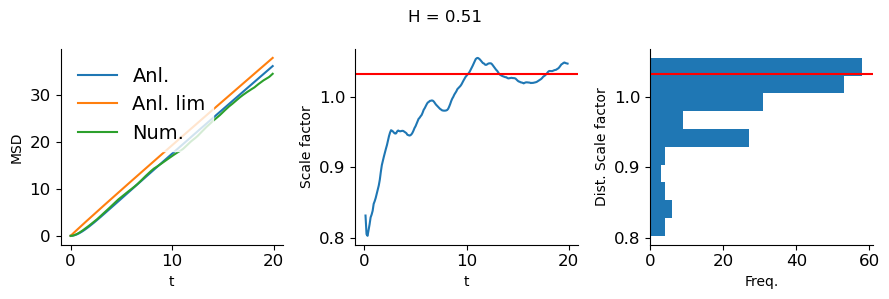

In [45]:
df = pd.DataFrame()
df = pd.concat([df,plot_msd(0.51, T=20, realizations = realizations)])

100%|██████████| 1000/1000 [00:06<00:00, 152.93it/s]


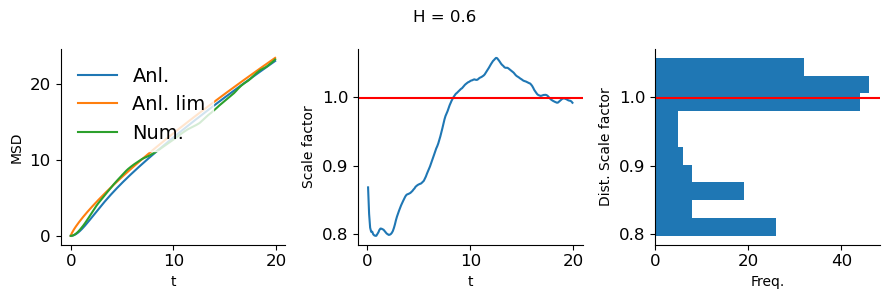

In [46]:
df = pd.concat([df,plot_msd(0.6, T=20, realizations = realizations)])

100%|██████████| 1000/1000 [00:06<00:00, 151.82it/s]


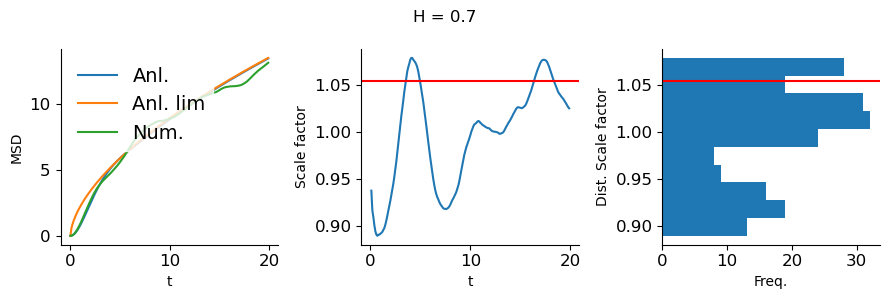

In [47]:
df = pd.concat([df,plot_msd(0.7, T=20, realizations = realizations)])

100%|██████████| 1000/1000 [00:06<00:00, 155.95it/s]


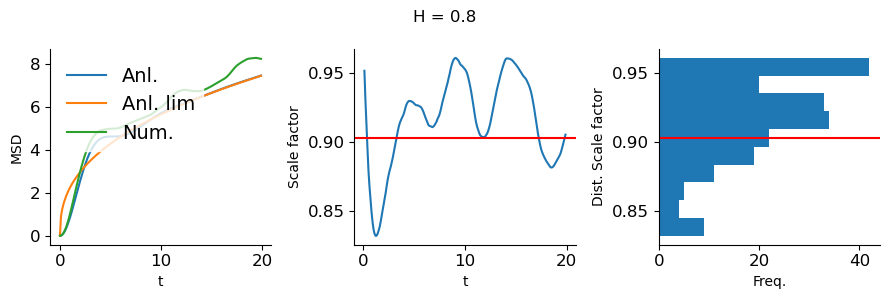

In [48]:
df = pd.concat([df,plot_msd(0.8, T=20, realizations = realizations)])

100%|██████████| 1000/1000 [00:16<00:00, 59.91it/s]


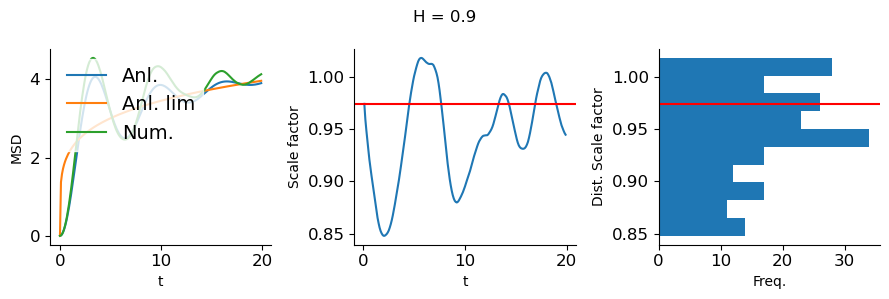

In [49]:
df = pd.concat([df,plot_msd(0.9, T=20, realizations = realizations)])

100%|██████████| 1000/1000 [00:16<00:00, 59.05it/s]


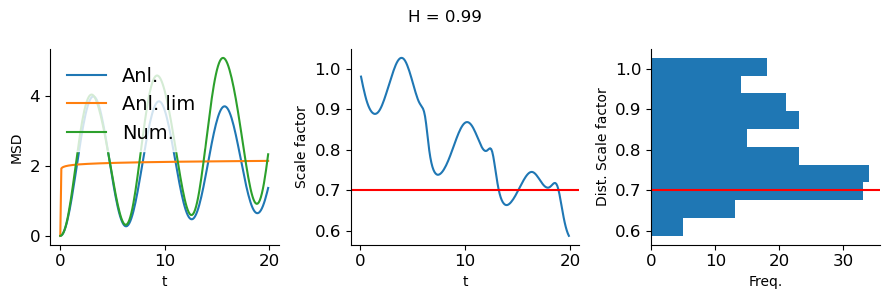

In [50]:
df = pd.concat([df,plot_msd(0.99, T=20, realizations = realizations)])

NOTES:
* The MSD works when scaling the noise by $\sqrt{3-2H}$  

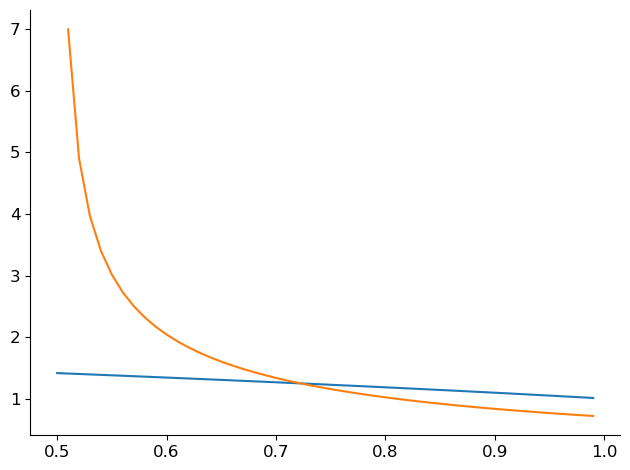

In [30]:
H = np.arange(0.5, 1, 0.01)
#zeta = 1/((gamma(1.5-H)*gamma(0.5+H))/((2*H-1)*gamma(2-2*H)))
zeta = np.sqrt(3-2*H)
zeta1 = np.sqrt(1/(2*H*(2*H-1)))
plt.plot(H, zeta)
plt.plot(H, zeta1)